In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic_data = pd.read_csv('train.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit (n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_train_set = titanic_data.loc[test_indices]

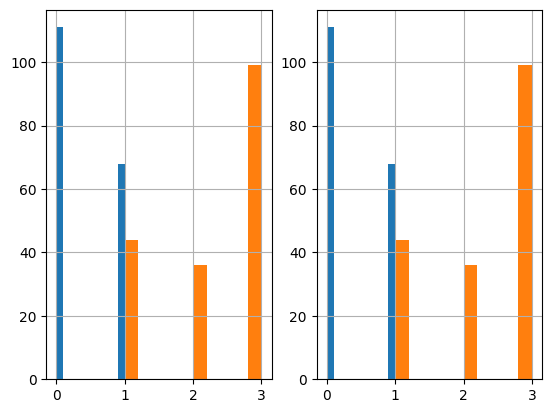

In [11]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.show()

In [12]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 789 to 217
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          141 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        41 non-null     object 
 11  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X [['Age']])
        return X

In [46]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(x[['Embarked']]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range (len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

In [67]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit (self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [68]:
from sklearn.pipeline import Pipeline

# Assuming 'features_to_drop' is a list of the features you want to drop
features_to_drop = [...]  # Replace [...] with your actual list of features

pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])

In [89]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [90]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
789,790,0,1,46.0,0,0,79.2000
759,760,1,1,33.0,0,0,86.5000
132,133,0,3,47.0,1,0,14.5000
781,782,1,1,17.0,1,0,57.0000
113,114,0,3,20.0,1,0,9.8250
...,...,...,...,...,...,...,...
317,318,0,2,54.0,0,0,14.0000
254,255,0,3,41.0,0,2,20.2125
213,214,0,2,30.0,0,0,13.0000
385,386,0,2,18.0,0,0,73.5000


In [91]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 789 to 217
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Age          179 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 11.2 KB


In [92]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [82]:
final_clf = grid_search.best_estimator_

In [83]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=10)

In [93]:
strat_test_set = pipeline.fit_transform (strat_test_set)

In [94]:
X_test = strat_train_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [95]:
final_clf.score(X_data_test, y_data_test)

0.8324022346368715

In [96]:
final_data = pipeline.fit_transform(titanic_data)

C:\Users\Maqso\AppData\Local\Temp\ipykernel_21236\973971176.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = imputer.fit_transform(X [['Age']])


In [97]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542
872,873,0,1,33.0,0,0,5.0000
879,880,1,1,56.0,0,1,83.1583
887,888,1,1,19.0,0,0,30.0000


In [98]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [101]:
prod_clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [102]:
prod_final_clf = grid_search.best_estimator_

In [104]:
titanic_test_data_ = pd.read_csv("test.csv")

In [105]:
final_test_data = pipeline.fit_transform(titanic_test_data_)

In [106]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

C:\Users\Maqso\AppData\Local\Temp\ipykernel_21236\1896703401.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method="ffill")


In [107]:
predictions = prod_final_clf.predict(X_data_final_test)

In [110]:
final_df = pd.DataFrame(titanic_test_data_['PassengerId'])
final_df ['Survived'] = predictions
final_df.to_csv("predictions.csv", index=False)

In [111]:
final_df

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1
